<h1><center>Laboratorio 6: El Pandas no Muerde (act III) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudantes: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Ricardo Torres
- Nombre de alumno 2: Simon Estrada


### **Link de repositorio de GitHub:**

https://github.com/simonestrada/LAB-6-MDS

https://github.com/RicardoTorresP/Laboratorio-6



## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [9]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

In [10]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
cd "/content/drive/MyDrive/Lab_06"

/content/drive/MyDrive/Lab_06


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas y si es posible extraer los diferenciar los tipos de clientes que posee el retail.

Para esto, el área de ventas les entrega el archivo `online_retail_II.xlsx` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [12]:
df_retail = pd.read_pickle("online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [13]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  category      
 1   StockCode    525461 non-null  category      
 2   Description  525461 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  category      
 7   Country      525461 non-null  object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 24.6+ MB


In [14]:
df_retail.describe()

,Quantity,Price
count,525461.000000,525461.000000
mean,10.337667,4.688834
std,107.424110,146.126914
min,-9600.000000,-53594.360000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,19152.000000,25111.090000


Al observar la información anterior, se observa un dataframe con 525461 registros de compras, donde se tienen los siguientes 8 atributos:

*   Invoice: Es el número de la factura, corresponde a variable categórica
*   StockCode: Corresponde al código del producto, es una variable categórica
*   Descrption: Es la descripción del producto, una variable tipo string
*   Quantity: Corresponde a la cantidad de productos asociados a la compra, una variable numérica tipo int
*   InvoiceDate: Es la fecha en que fue realizada la factura, una variable tipo datatime
*   Price: Precio del producto, variable numérica tipo float
*   Customer ID: Corresponde a la identificación del cliente, una variable categórica
*   Country: Es el país donde se realiza la factura, una variable tipo string.

## 1.2 Análisis Explotatorio de los Datos [0.5 puntos]

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> El análisis univariado es el primer paso de un EDA y se enfoca en analizar cada variable de forma individual. Durante el análisis univariado, se utilizan diversas técnicas estadísticas y gráficas para explorar las características de una variable.

> El análisis bi y multivariado en un EDA implica el estudio simultáneo de dos o más variables en un conjunto de datos para determinar las relaciones entre ellas.

> En cuanto al análisis de datos faltantes, este nos permite emplear estrategias de imputación para aprovechar mejor los datos disponibles y garantizar resultados más precisos al reducir el impacto de la falta de información.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie.

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [15]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada

        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")

    else:
            count = (
                serie.value_counts()[0:100]
                .reset_index()
                .rename(columns = {serie.name: 'Count'})
            )
            fig = px.bar(
                x=count['index'].astype(str),
                y=count["Count"],
                title=f"100 Most common categories of {serie.name}",
            )

    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

### Serie: Price

In [16]:
profile_serie(df_retail['Price'])

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

La variable "Precio" representa los costos de los artículos adquiridos en el mercado de retail. Al examinar las métricas, observamos que la media de los precios es de 4.688, con una desviación estándar de 146.12. Esto indica que, en general, los precios se mantienen cerca de 4.6, pero también muestran una considerable dispersión. Además, se detectan valores negativos, con solo 3 precios negativos en el conjunto de datos, lo que podría considerarse insignificante dada la cantidad total de datos en el conjunto. En cuanto al valor máximo, este asciende a 25111.09, significativamente superior a la media, lo que contribuye a la alta desviación estándar, tal como se evidencia al considerar el valor mínimo previamente mencionado.

En relación a los histogramas, el primero, que incluye los valores atípicos (outliers), revela que hay una cantidad significativa (813 en total) de muestras con valores en el rango de -5 a 4.99. Sin embargo, este histograma pierde información al no tener en cuenta los outliers en una escala mucho mayor. Al examinar el histograma sin outliers, notamos que la mayoría de los datos se concentra en el intervalo de 0.5 a 1.49, con 270 observaciones en esa categoría, disminuyendo gradualmente a medida que aumenta el precio.

En resumen, podemos inferir que las compras a precios bajos son más comunes que las de valores elevados, y que los productos con precios entre 0.5 y 1.49 son los más populares en general.









In [17]:
profile_serie(df_retail['Invoice'])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object


En el gráfico anterior se puede observar la distribución de los 100 códigos de facturas más frecuentes. Debido a que los valores de esta columna corresponden a códigos relacionados con la transacción realizada, el análisis no puede ser demasiado profundo. Además, es notable la diferencia bastante clara entre los primeros dos códigos y el resto, los cuales descienden de manera mucho más gradual.

In [18]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object


Al igual que en el histograma anterior, la distribución de los códigos de stock es bastante uniforme en la mayoría de las categorías disponibles, excepto por el primer código, que contiene significativamente más artículos que el resto de los códigos. Esto puede deberse a una variedad de productos que, debido a su baja relevancia, se agrupan bajo un solo código. Como también podría ser el resultado de un producto que está disponible en grandes cantidades en el inventario.

In [19]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object


Una vez más, se puede apreciar una distribución bastante similar entre las primeras 100 categorías de descripciones, donde las primeras descripciones tienen muchas más transacciones que el resto de los productos. Esto refleja claramente la tendencia de los productos más populares en las ventas en retail. Es evidente que las primeras 4 categorías muestran un aumento significativo, llegando a tener una diferencia de hasta 1000 ventas con respecto a las otras 100 categorías más comunes.

In [20]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

Dada la naturaleza numérica de la variable de cantidad, se pueden realizar una amplia variedad de gráficos y análisis estadísticos. En primer lugar, se observa una media de 10.33 en la cantidad de productos, con una gran desviación estándar de 107.42. Esta variabilidad se vuelve aún más evidente al considerar los valores mínimos y máximos, que son -9600 y 19152 respectivamente. Estos valores son problemáticos por sí mismos, dado que las cantidades no pueden ser negativas. Al analizar los histogramas, se puede notar la diferencia que implica considerar o no los valores outliers.

Al eliminar los outliers, los valores mínimos y máximos cambian a -26 y 100 respectivamente. Aunque todavía se contemplan valores negativos, la diferencia no es tan pronunciada. Además, el promedio disminuye a 3 y se observa una variación significativamente menor en los datos cuando se representan gráficamente.

In [21]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

Al examinar los datos correspondientes a las fechas de las transacciones, se pueden realizar análisis numéricos como calcular el promedio, el mínimo o el máximo. Sin embargo, estos resultados simplemente indicarían los intervalos temporales en los que se llevó a cabo el estudio y, por sí solos, no proporcionarían información significativa. Por otro lado, al crear un histograma con estos datos, se pueden realizar análisis importantes en relación con los cambios en la frecuencia de compras a lo largo de los meses y años.

Es evidente cierta periodicidad en los momentos en que se compra más y menos, especialmente a principios y finales de cada mes, lo que está estrechamente relacionado con los períodos de pago de la gente. Además, se observa un notable aumento en el número de ventas a medida se acerca a diciembre, especialmente cerca de las fechas de navidad. Este aumento es completamente esperado en el contexto de una tienda de retail.

In [22]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

Similar a los otros resultados del análisis de categorías, se observa un conjunto reducido de IDs que registran un gran número de compras, mientras que el resto se mantiene en un rango mucho menor y disminuye de manera mucho más gradual. Esta disparidad se puede atribuir a un par de individuos o clientes que realizan la mayoría de las transacciones en este conjunto de datos. Esta situación podría ser el resultado de empresas que efectúan compras exclusivamente desde la ubicación donde se recopilan los datos, así como de clientes que adquieren numerosos artículos en una sola transacción.

En otras palabras, este gráfico puede analizarse desde la perspectiva de clientes que realizan compras frecuentes a lo largo del año o desde la perspectiva de clientes que efectúan compras grandes en cada transacción.

In [23]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

Finalmente, al analizar la variable  país de manera individual, es evidente la predominancia de transacciones realizadas en Reino Unido, con un total de 485 mil ventas. No obstante, también se pueden observar porcentajes de ventas significativamente más bajos en otros países como EIRE (Irlanda), Alemania y Francia, con cantidades cercanas a las 5 mil, así como al menos 34 otros países adicionales con cantidades considerablemente menores.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes. Ejecute la función `profile_df` y comente sus resultados.

In [24]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)


    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i])
            plt.ylabel(list_type[j])
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

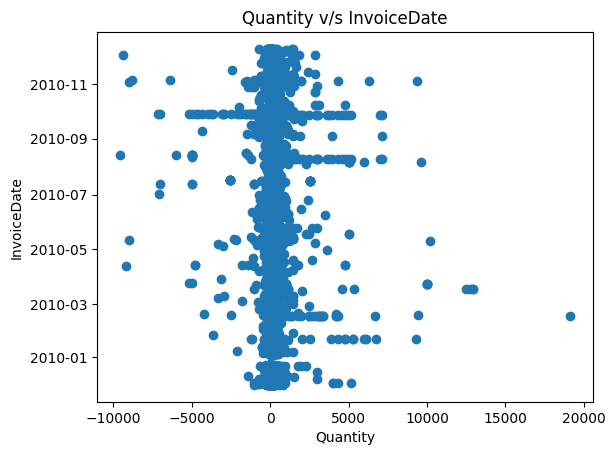

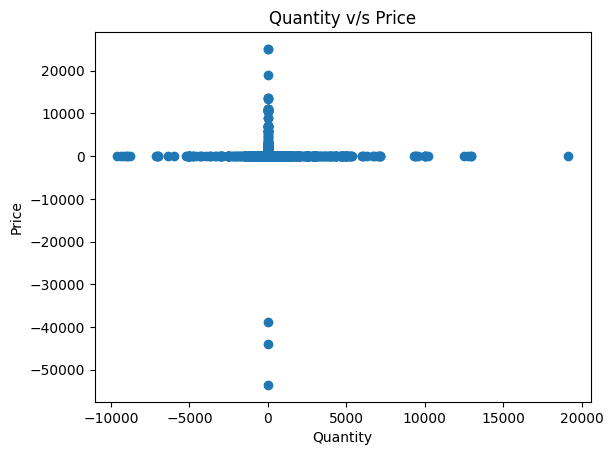

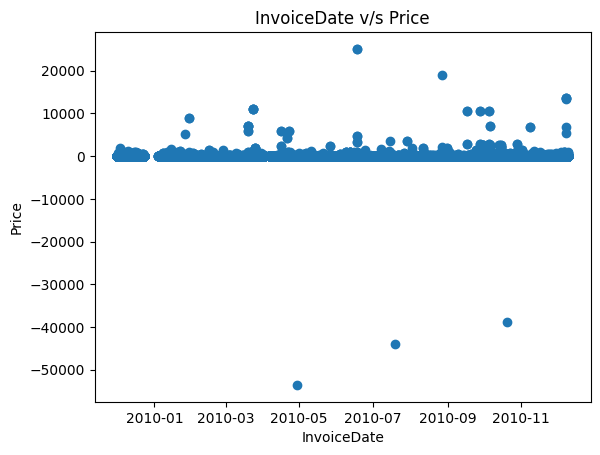

## Correlation:

<ipython-input-24-9860ad8414c9>:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

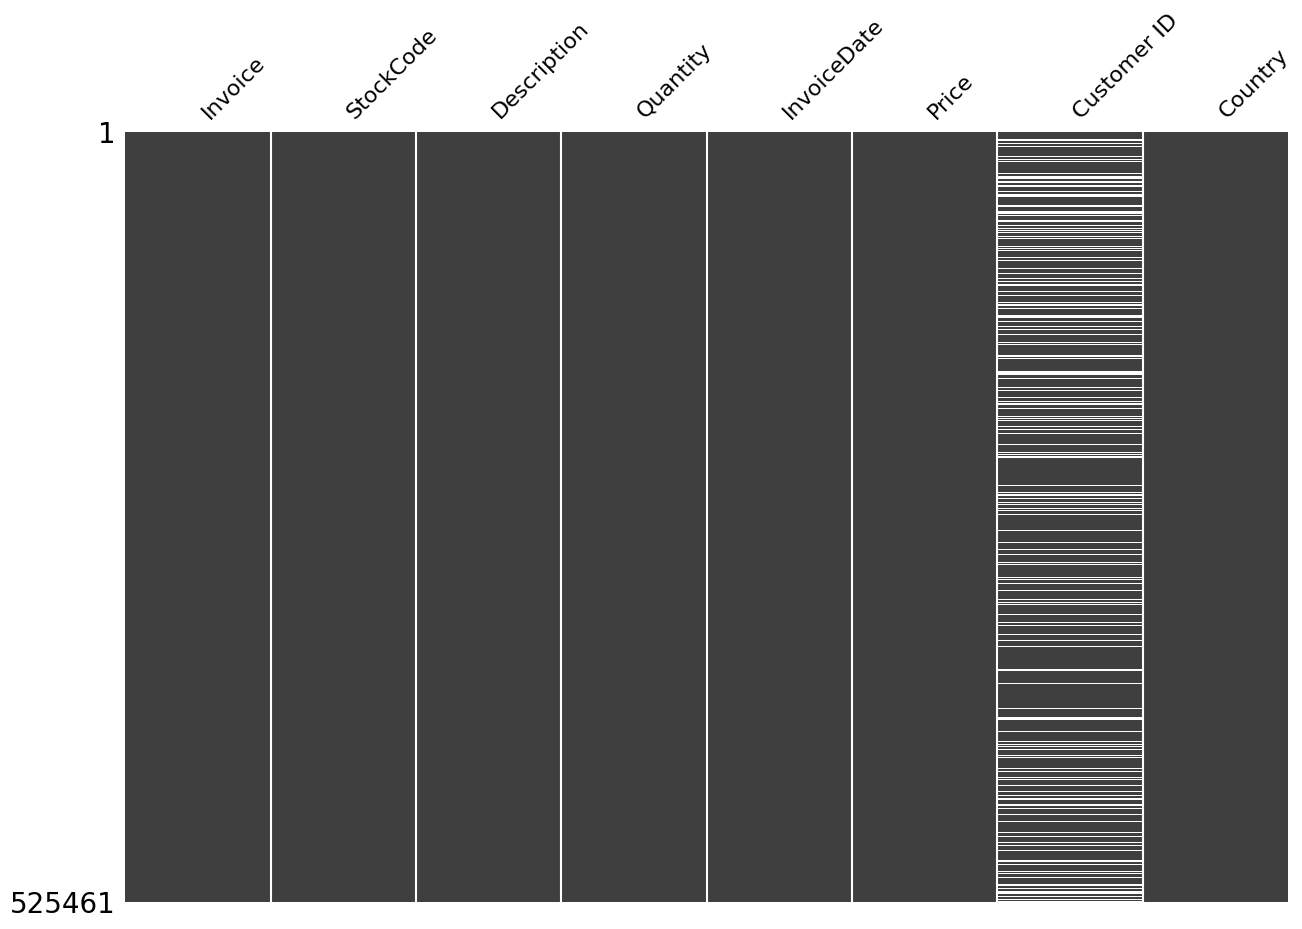

In [25]:
profile_df(df_retail)

De los primeros gráficos multivariados se puede observar la relación entre 4 variables de distintas formas:

En primera instancia, se analiza el gráfico de cantidad y fecha, en el cual se aprecian las distintas cantidades positivas y negativas, en cada fecha registrada en el dataset.

En el segundo gráfico se evidencia la relación entre la cantidad y el precio, donde el gráfico no aporta demasiada información debido a la escala de ambos valores y sus outliers, lo cual no permite analizar de forma más detallada los valores más cercanos a 0. Por otro lado, se puede observar una gran cantidad de valores negativos en precio y cantidad, lo cual no corresponde debido al contexto de los datos.

En el tercer gráfico se observa la relación entre fecha y precio, donde nuevamente se observa un gráfico con valores bastante parecidos, a excepción de los outliers y los valores de precios negativos.

El gráfico de correlación entre precio y cantidad entrega la información de que las variables de precio y cantidad están casi totalmente no relacionadas, lo cual podría resultar bastante contra intuitivo.

Finalmente, al analizar la matriz de datos faltantes, es evidente que todas las columnas tienen los datos bastante completos, a excepción de Customer ID, lo cual puede estar relacionado con las transacciones realizadas de forma anónima sin registrar el usuario en el sistema.

De todo lo anterior, los resultados más problemáticos se pueden resumir en los valores negativos en precio y cantidad, además de la gran cantidad de datos faltantes en Customer ID.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que genere una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

In [37]:
def clean(df):
  data= df.copy()
  data = data[data['Price']> 0]
  data = data[data['Quantity']> 0]
  data['Customer ID'] = data['Customer ID'].cat.add_categories("Anon")
  data['Customer ID'].fillna("Anon", inplace=True)
  return data

In [52]:
df_limpio= clean(df_retail)

In [44]:
profile_serie(df_limpio["Price"])

## Price Profile

Type                            float64
Number of observations         511566.0
Mean                           4.252563
Std                           63.664629
Min                               0.001
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       61551.915238
Skew                           210.3689
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   510710
Duplicate rows (%)              99.83 %
Total size in memory      8185056 bytes
dtype: object

In [45]:
profile_serie(df_limpio["Quantity"])

## Quantity Profile

Type                              int64
Number of observations         511566.0
Mean                           11.40015
Std                           86.761177
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                       11849.646687
Skew                           88.67179
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   511425
Duplicate rows (%)              99.97 %
Total size in memory      8185056 bytes
dtype: object

## Bivariant Analysis:

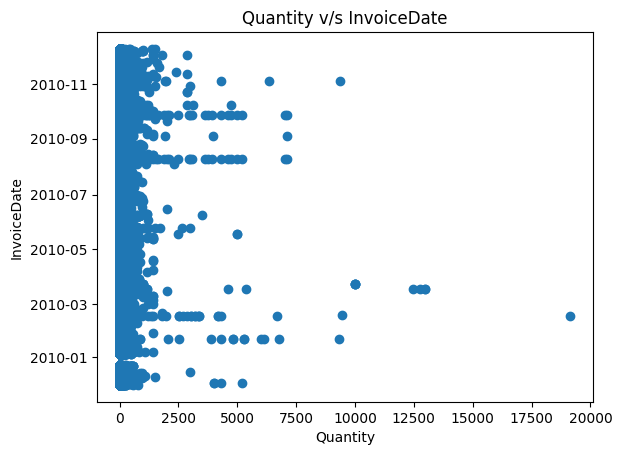

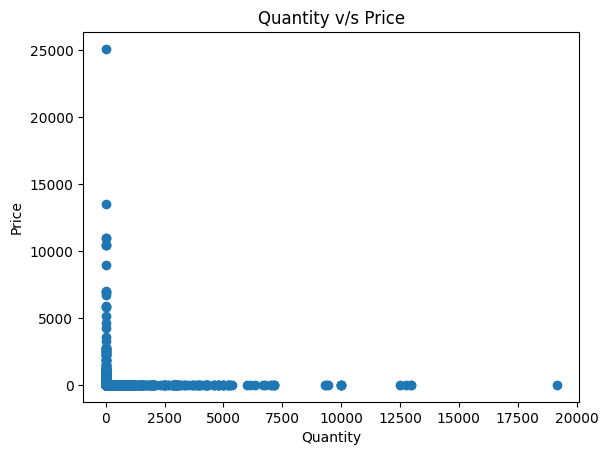

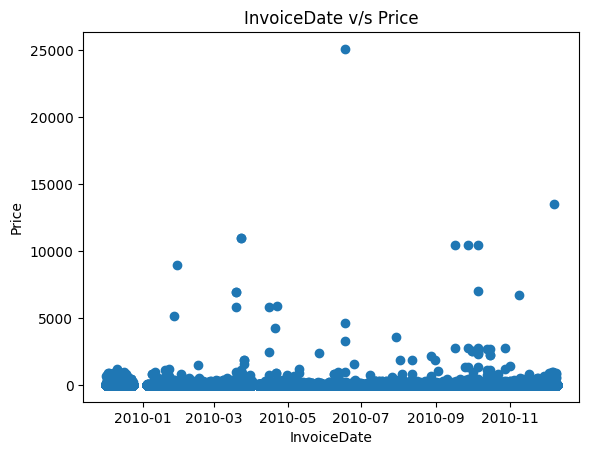

## Correlation:

<ipython-input-24-9860ad8414c9>:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



## Missing Matrix:

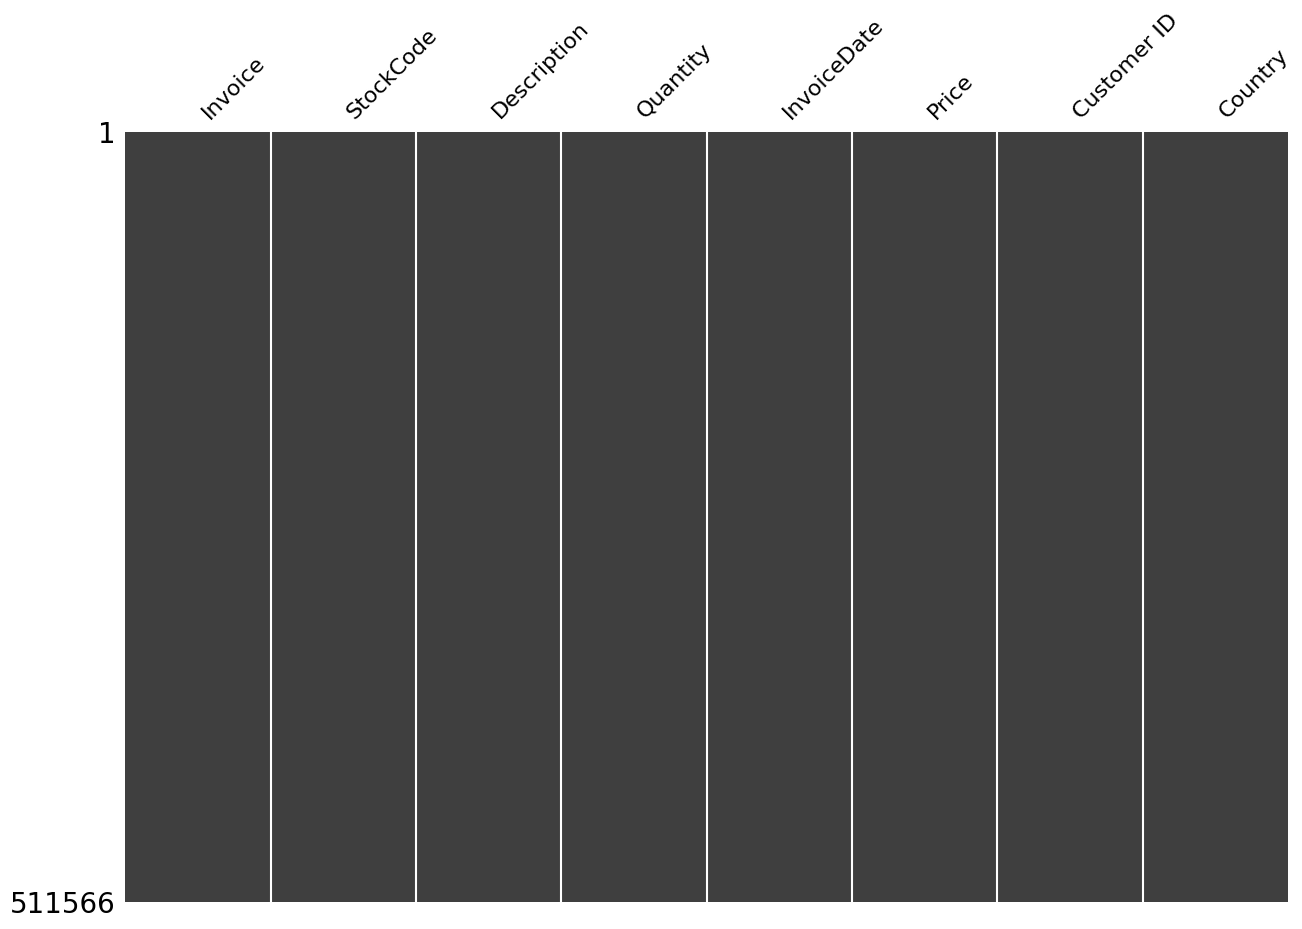

In [42]:
profile_df(df_limpio)

Realizando el análisis exploratorio del dataset limpio, se puede evidenciar que debido a que la limpieza realizada solo afecta a los datos negativos de precio y cantidad, además de los valores NaN de Customer ID, los gráficos que cambiaron de forma más abrupta corresponden a estos.

En primer lugar, en ambas columnas numéricas se observa que los datos están mucho más concentrados cerca del 0, por lo que los valores promedio disminuyen adecuadamente. Los outliers en estas columnas siguen siendo prevalentes, pero se pueden manejar fácilmente al considerar un umbral adecuado dependiendo del tipo de datos.

Por otro lado, al rellenar los valores NaN con "Anon", la columna Customer ID deja de tener missing values y es más fácil de analizar de esta forma, teniendo en cuenta que la falta de datos en esta columna simplemente representa otro tipo más de cliente.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [51]:
df_limpio

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Ganancia
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [61]:
df_limpio["Ganancia"] = df_limpio["Quantity"]*df_limpio["Price"]
productos=  df_limpio.groupby("Description")[["Ganancia", "Quantity"]].sum().reset_index()
top_30 = productos.sort_values(by="Ganancia", ascending=False).head(30)


fig = px.bar(top_30, x="Description", y=["Ganancia", "Quantity"],
             title="Top 30 productos con mayor ganancia",
             labels={'Description': 'Producto', 'value': 'Valor'})
fig.update_layout(barmode='group')
fig.show()

De este gráfico de ganancias se puede observar el efecto que tiene el precio de los productos frente a la cantidad de ventas de estos mismos. Esto se ve claramente al analizar los resultados correspondientes a 'Manual' y 'WHITE HANGING HEART T-LIGHT HOLDER', los cuales se encuentran en el top de ganancias, pero tienen una diferencia fundamental relacionada al precio de cada uno. Del gráfico se puede concluir que 'WHITE HANGING HEART T-LIGHT HOLDER' tiene un número de ventas bastante grande, pero un precio bastante menor a 'Manual', el cual tiene bastante pocas ventas pero ganancias mucho mayores.

Por lo tanto, al analizar las ganancias respecto a cada producto, hay que tener en cuenta la relación cantidad/precio, la cual, como se ha visto en gráficos anteriores, no tiene valores altos de correlación.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [59]:
def plot_ventas(dataframe):
  dataframe = dataframe.copy()
  dataframe['InvoiceDate'] = pd.to_datetime(dataframe['InvoiceDate'])
  ganancias_fecha = dataframe.groupby(dataframe['InvoiceDate'].dt.strftime('%Y-%m-%d'))[['Ganancia', 'Quantity']].sum().reset_index()
  fig = px.line(ganancias_fecha, x='InvoiceDate', y=['Ganancia', 'Quantity'], title='Ganancia y cantidad de ventas en el tiempo',
                labels={'InvoiceDate': 'Fecha',  'value': 'Valor'})
  fig.update_xaxes(type='category')
  fig.show()

In [62]:
plot_ventas(df_limpio)

Analizando este gráfico de serie de tiempo, se puede apreciar cierta periodicidad en las ganancias obtenidas a lo largo del año, teniendo ciertos picos en cantidad de ventas, los cuales no afectaron de sobremanera la ganancia relacionada a este pico. Esto tiene sentido si se trata de productos que son altamente requeridos de forma periódica, pero que no tienen un precio muy alto. Esta tendencia se mantiene a lo largo del año, a excepción de fin de año, en donde, aunque se observan un par de picos en cantidad, estos no afectan la ganancia en general, pero sí se observa que la ganancia aumenta sustancialmente en estas fechas. Lo cual indicaría un alza en la compra de productos más caros que en el resto del año.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>